# Gradient Boosting

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import optuna

print("Версия Optuna: {}".format(optuna.__version__))

Версия Optuna: 3.1.0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from matplotlib import pyplot as plt
import joblib

In [ ]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train MAE: {:.2f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.2f}%'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('Train R^2: {:.2f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('\n')
    print('Test MAE: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.2f}%'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))
    print('Test R^2: {:.2f}'.format(metrics.r2_score(y_test, y_test_predict)))

def print_test(y_test, y_test_pred):
  y_t = []
  y_t_p = []
  cnt = 0
  for i in range(len(y_test)):
    if cnt < len(y_test):
      y_t.append(y_test[cnt])
      y_t_p.append(y_test_pred[cnt])
      cnt += 1000
    else:
      break
  return(y_t, y_t_p)

In [ ]:
X_train_scaled = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/X_train_scaled.zip')
X_test_scaled = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/X_test_scaled.zip')
y_train = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/y_test.csv')
y_train = y_train['target'].tolist()
y_test = y_test['target'].tolist()
y_train_log = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/y_train_log.csv')
y_train_log = y_train_log['target'].tolist()

In [ ]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(len(y_train))
print(len(y_test))

(280575, 25)
(70144, 25)
280575
70144


In [ ]:
random_state = 42

In [ ]:
# Гип. параметры по умолчанию
gbr = GradientBoostingRegressor()
hiperparams = gbr.get_params()

print("Гиперпараметры по умолчанию:")
for key, value in hiperparams.items():
    print(f"\t{key}: {value}")

Гиперпараметры по умолчанию:
	alpha: 0.9
	ccp_alpha: 0.0
	criterion: friedman_mse
	init: None
	learning_rate: 0.1
	loss: squared_error
	max_depth: 3
	max_features: None
	max_leaf_nodes: None
	min_impurity_decrease: 0.0
	min_samples_leaf: 1
	min_samples_split: 2
	min_weight_fraction_leaf: 0.0
	n_estimators: 100
	n_iter_no_change: None
	random_state: None
	subsample: 1.0
	tol: 0.0001
	validation_fraction: 0.1
	verbose: 0
	warm_start: False


In [ ]:
def GBR(trial):
    
    param = {
        # 'n_estimators': trial.suggest_categorical("n_estimators", [1, 200, 300, 3000]),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 100),
        'min_samples_split': trial.suggest_int('min_samples_split', 1, 100),
        'random_state':42,
        # 'max_bin': trial.suggest_int('max_bin', 20, 500),
        # 'bagging_seed': trial.suggest_int('bagging_seed', 5, 500),
        # 'feature_fraction_seed': trial.suggest_int('feature_fraction_seed', 1, 10),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008, 0.009, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02]),
        # 'verbose': trial.suggest_int('verbose', -5, 5)

        "n_estimators": trial.suggest_int("n_estimators", 100, 5000, step=100),
        # "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.3, log=True),
        # "max_depth": trial.suggest_int("max_depth", 3, 9),
        # "subsample": trial.suggest_float("subsample", 0.5, 0.9, step=0.1),
        # "max_features": trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"]),
        # "n_iter_no_change": 50,  # early stopping
        # "validation_fraction": 0.05
    }
    # Инициализируем GradientBoostingRegressor объект.
    gbr = GradientBoostingRegressor(**param)


    gbr.fit(X_train_scaled, y_train_log)
    y_test_pred = np.exp(gbr.predict(X_test_scaled))
    
    score = metrics.r2_score(y_test, y_test_pred)

    return score

https://www.kaggle.com/code/bextuychiev/no-bs-guide-to-hyperparameter-tuning-with-optuna

In [ ]:
%%time
study = optuna.create_study(direction='maximize')
study.optimize(GBR, n_trials=10)
print('=======================================================')
print('No of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-03-14 09:31:59,315] A new study created in memory with name: no-name-d6f6a8ec-b595-49b6-893d-d94fb2a5fc77
[I 2023-03-14 09:52:29,803] Trial 0 finished with value: 0.7786579365884969 and parameters: {'min_samples_leaf': 73, 'min_samples_split': 3, 'learning_rate': 0.018, 'n_estimators': 1900}. Best is trial 0 with value: 0.7786579365884969.
[I 2023-03-14 09:56:43,899] Trial 1 finished with value: 0.6388776954032884 and parameters: {'min_samples_leaf': 28, 'min_samples_split': 53, 'learning_rate': 0.014, 'n_estimators': 400}. Best is trial 0 with value: 0.7786579365884969.
[I 2023-03-14 09:57:53,777] Trial 2 finished with value: 0.276275673079426 and parameters: {'min_samples_leaf': 94, 'min_samples_split': 12, 'learning_rate': 0.014, 'n_estimators': 100}. Best is trial 0 with value: 0.7786579365884969.
[I 2023-03-14 10:40:00,511] Trial 3 finished with value: 0.7918399506132685 and parameters: {'min_samples_leaf': 82, 'min_samples_split': 43, 'learning_rate': 0.016, 'n_estimators

No of finished trials: 10
Best trial: {'min_samples_leaf': 1, 'min_samples_split': 51, 'learning_rate': 0.02, 'n_estimators': 3900}
CPU times: user 3h 20min 40s, sys: 12.6 s, total: 3h 20min 53s
Wall time: 3h 21min 31s


In [ ]:
# рассчитаем точность для обучающей и тестовой выборок.
gbr = GradientBoostingRegressor(**study.best_params, random_state=random_state)
gbr.fit(X_train_scaled, y_train_log)

# Производим сериализацию и сохраняем результат в файл формата .joblib
joblib.dump(gbr, '/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/fit_models/gbr.joblib')

y_train_pred_gbr = np.exp(gbr.predict(X_train_scaled))
y_test_pred_gbr = np.exp(gbr.predict(X_test_scaled))

# Сохраним предсказание в файл.
np.savetxt("/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/y_test_pred/y_test_pred_gbr.csv", y_test_pred_gbr, delimiter=",")

print_metrics(y_train, y_train_pred_gbr, y_test, y_test_pred_gbr)

Train MAE: 89090.32
Train MAPE: 22.53%
Train R^2: 0.81


Test MAE: 92532.03
Test MAPE: 23.49%
Test R^2: 0.80


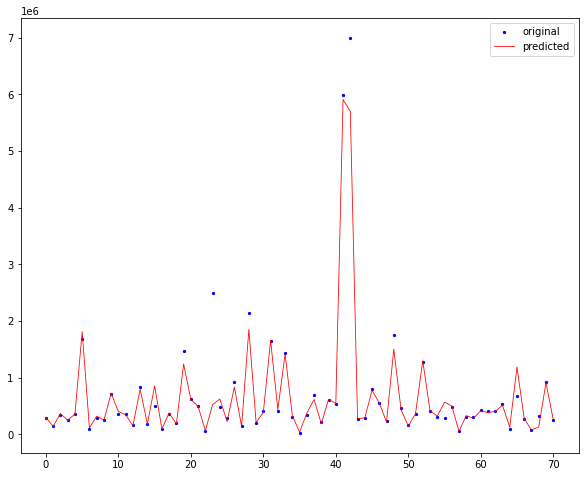

In [ ]:
# Возмём каждую 1000-ю строку из выборок, чтобы визуально убедиться в точности предсказаний.
y_t, y_t_p = print_test(y_test, y_test_pred_gbr)

# Визуализируем предсказания на тестовой выборке.
x_ax = range(len(y_t))
plt.figure(figsize=(10,8))
# Точки тестовой выборки.
plt.scatter(x_ax, y_t, s=5, color="blue", label="original")
# График предсказаний.
plt.plot(x_ax, y_t_p, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

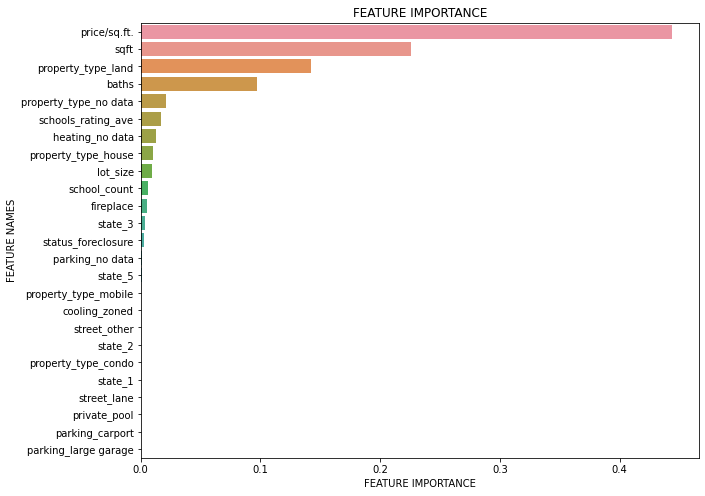

In [ ]:
# Покажем важность признаков.
feature_importance = np.array(gbr.feature_importances_)
feature_names = np.array(X_train_scaled.columns)

# Создадим DataFrame, используя словарь.
data = {'feature_names': feature_names, 'feature_importance': feature_importance}
fi_df = pd.DataFrame(data)

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

# Определим размер столбчатой диаграммы.
plt.figure(figsize=(10,8))
# Построим столбчатую диаграмму.
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
# Добавим метки диаграммы.
plt.title('FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES');

In [ ]:
mae_gbr = metrics.mean_absolute_error(y_test, y_test_pred_gbr)
mape_gbr = metrics.mean_absolute_percentage_error(y_test, y_test_pred_gbr)*100
r2_gbr = metrics.r2_score(y_test, y_test_pred_gbr)

print(round(mae_gbr, 2))
print(round(mape_gbr, 2))
print(round(r2_gbr, 2))

92532.03
23.49
0.8


In [ ]:
optuna.visualization.plot_optimization_history(study, target_name="r2_score")

In [ ]:
optuna.visualization.plot_param_importances(study, target_name="r2_score")